<a href="https://colab.research.google.com/github/pmama/FinancialProject/blob/main/Financial_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.ibb.co/rfnCR1q/Investigation-66.jpg' >

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lifeline of the ML Project


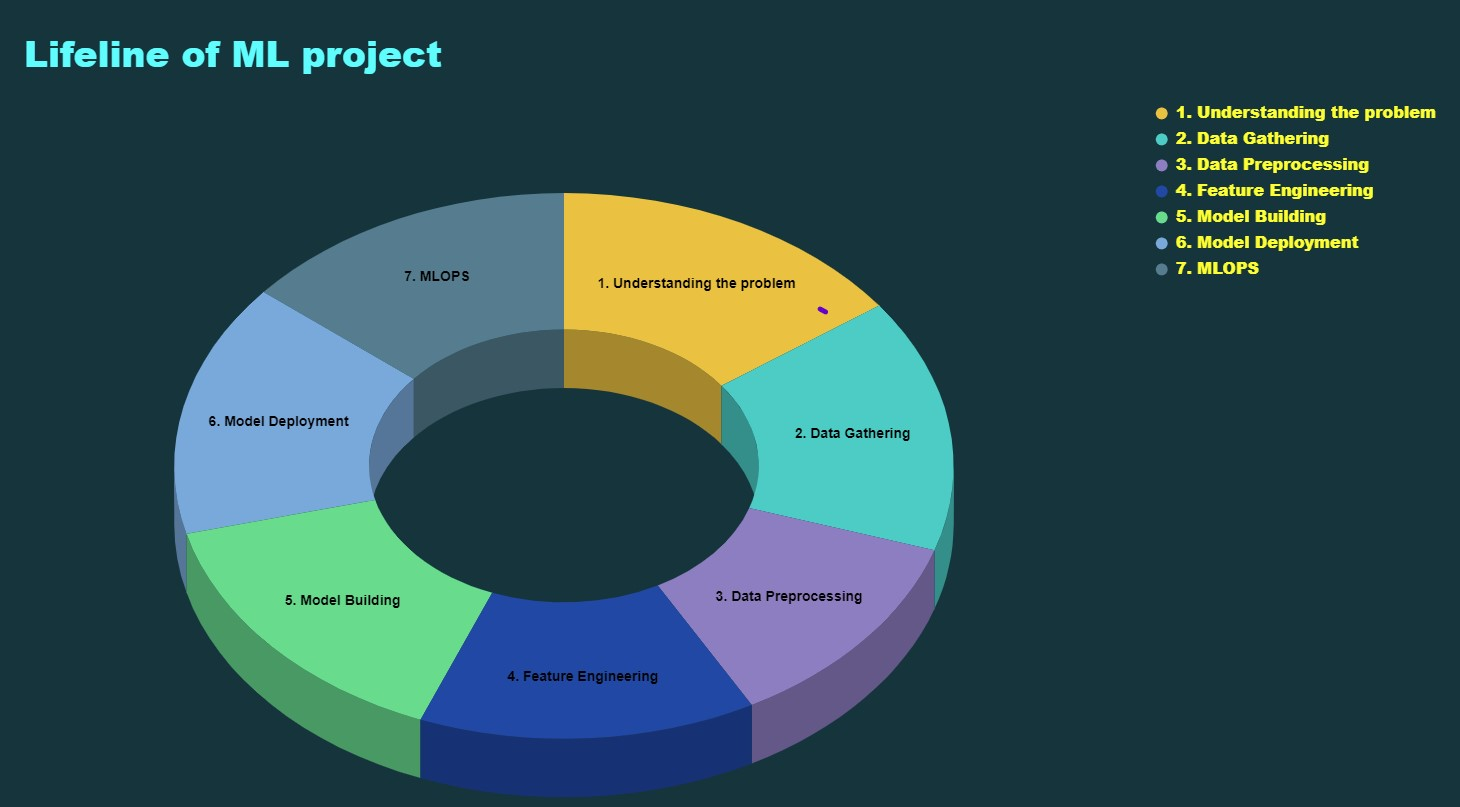

# STEP 1 : Problem Statement:
PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them. Your job as PredCatch's Data Scientist is to build this fraud detection & prevention predictive model in the first step. If successful, in the 2nd step you will have to present your solutions and explain how it works to the client. The data has been made available to you.
The challenging part of the problem is that the data contains very few fraud instances in comparison to the overall population. To give more edge to the solution they have also collected data regarding
- `[geo_scores]`      : location of the transactions

- `[instance_scores]` : vulnerability qualification score (civil Score)

- `[Lambda_wts]`      : their own proprietary index

- `[Qset_tats]`       : on network turn around times  (Transaction time)
 .

Training data contains masked variables pertaining to each transaction id .
- `['Target']` : (`1` : Fraudulent transactions, `0` : Clean transactions)

## Importing Necessary Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import  warnings
warnings.filterwarnings('ignore')

# STEP 2 : Data Gathering:

In [3]:
dataset1 = '/content/drive/MyDrive/data/Geo_scores.csv'
dataset2='/content/drive/MyDrive/data/instance_scores.csv'
dataset3 ='/content/drive/MyDrive/data/Lambda_wts.csv'
dataset4='/content/drive/MyDrive/data/Qset_tats.csv'
dataset5 ='/content/drive/MyDrive/data/test_share.csv'
dataset6 ='/content/drive/MyDrive/data/train.csv'

df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)
df3 = pd.read_csv(dataset3)
df4 = pd.read_csv(dataset4)
df5 = pd.read_csv(dataset5)
df6 = pd.read_csv(dataset6)

In [4]:
# saving the dataframes in different varaible for the analysis
geo = df1
score_inst = df2
Lambda = df3
Qset = df4
test = df5
train = df6

In [5]:
# listing all datframes for further analysis
df_list =[('Geo_scores',geo),
          ('instance_scores',score_inst),
          ('Lambda_wts', Lambda),
          ('Qset_tats', Qset),
          ('Test', test),
          ('Train',train)]

df_list[0]

('Geo_scores',
              id  geo_score
 0         26674       4.48
 1        204314       4.48
 2        176521       5.17
 3         48812      -2.41
 4        126870       6.55
 ...         ...        ...
 1424030  107880       1.03
 1424031  282410       8.62
 1424032  209634      -1.72
 1424033  211652     -10.00
 1424034   73455       5.86
 
 [1424035 rows x 2 columns])

In [6]:
df_list[0][0]

'Geo_scores'

In [7]:
df_list[0][1]

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55
...,...,...
1424030,107880,1.03
1424031,282410,8.62
1424032,209634,-1.72
1424033,211652,-10.00


# Reading all Datasets

In [8]:
for name, df in df_list:
    print(30*'==')
    print(name, ' :' , df.shape)
    print(30*'==')
    print(df.head())
    print()

Geo_scores  : (1424035, 2)
       id  geo_score
0   26674       4.48
1  204314       4.48
2  176521       5.17
3   48812      -2.41
4  126870       6.55

instance_scores  : (1424035, 2)
       id  instance_scores
0  173444            -0.88
1  259378             1.50
2  161170             0.44
3  191161             0.76
4   34521            -0.84

Lambda_wts  : (1400, 2)
     Group  lambda_wt
0   Grp936       3.41
1   Grp347      -2.88
2   Grp188       0.39
3  Grp1053      -2.75
4    Grp56      -0.83

Qset_tats  : (1424035, 2)
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
2   77525                  1.03
3  160765                -11.63
4  138220                 -4.48

Test  : (56962, 27)
       id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  146574  Grp229 -0.300000  1.540000  0.220000 -0.280000  0.570000  0.260000   
1  268759  Grp141  0.633333  0.953333  0.810000  0.466667  0.910000  0.253333   
2   59727  G

### - Shape of all dataframe are different.

# Exploring Dataset :

In [9]:
for name, df in df_list:
    print(30*'==')
    print(' '*15, name,  ' :   ', df.shape)
    print(30*'==')
    print(df.info())
    print()

                Geo_scores  :    (1424035, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None

                instance_scores  :    (1424035, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None

                Lambda_wts  :    (1400, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     

# STEP 3 : Data Preprocessing

# Duplicate Entries:

In [10]:
for name, df in df_list:
    #print(30*'=')
    print(' '*15,' o Duplicate entries in', name, ' : ', df.duplicated().sum())
    #print(30*'--')
    print()

                 o Duplicate entries in Geo_scores  :  55349

                 o Duplicate entries in instance_scores  :  33600

                 o Duplicate entries in Lambda_wts  :  0

                 o Duplicate entries in Qset_tats  :  59311

                 o Duplicate entries in Test  :  0

                 o Duplicate entries in Train  :  0



### We can drop duplicate entries from only train and test dataset.
(Here `Train` and `Test` has no duplicate entries.)

- from same location multiple transaction is possible.
- from same qualification score multiple transation is possible
- At same time, multiple transaction is possible.

#  Missing values:

Geo_scores  :
id           0.000000
geo_score    5.023964
dtype: float64

Qset_tats  :
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64



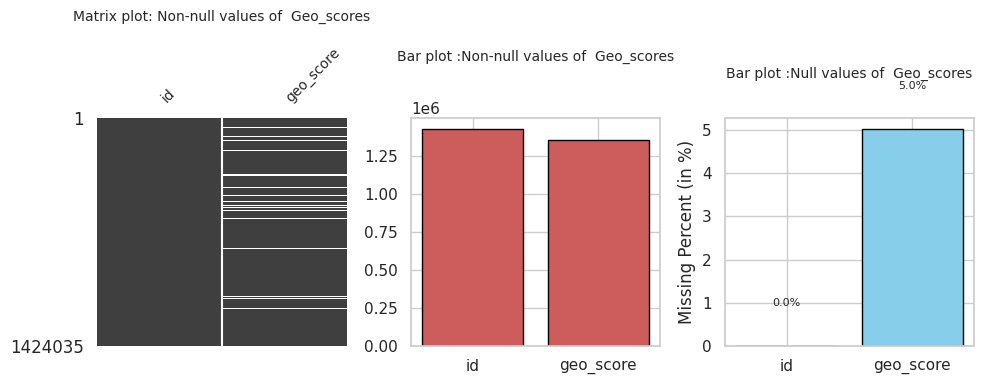

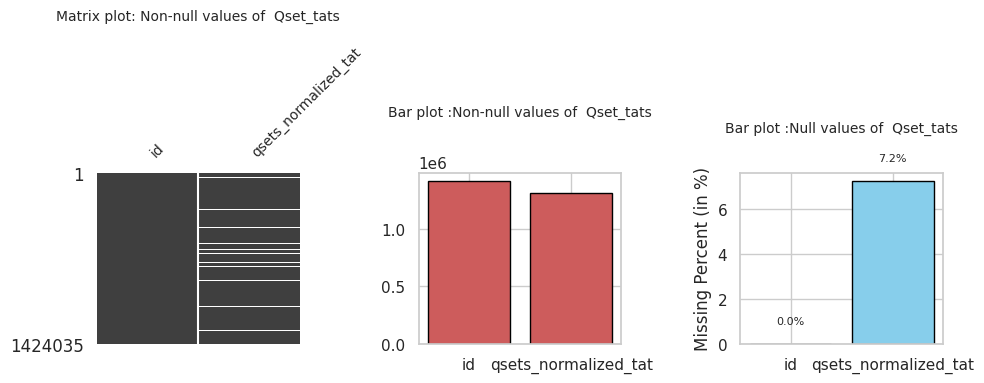

In [11]:
import missingno as msn

for idx, (name, df) in enumerate(df_list):
    if (df.isnull().any()).values.any():
        print(30*'==')
        print(name, ' :')
        print(30*'==')
        total_values = df[list(df)].count()
        missing_percent = df.isnull().sum()*100/len(df)
        print(missing_percent)
        print()


        fig, ax = plt.subplots(1, 3, figsize=(10, 4))
        msn.matrix(df, fontsize=10, ax=ax[0], color=(0.25, 0.25, 0.25),)
        ax[0].set_title(f'Matrix plot: Non-null values of  {name}\n', fontsize=10,  )

        ax[1].bar(total_values.index, total_values,  color='indianred', edgecolor='black')
        ax[1].set_title(f'Bar plot :Non-null values of  {name}\n\n', fontsize=10,)

        ax[2].bar(missing_percent.index, missing_percent, color='skyblue', edgecolor='black')
        for i, percent in enumerate(missing_percent):
            ax[2].text(i, percent + 1, f'{percent:.1f}%', ha='center', va='center', fontsize=8, )
        ax[2].set_title(f'Bar plot :Null values of  {name}\n\n', fontsize=10, )
        ax[2].set_ylabel('Missing Percent (in %)')


    plt.tight_layout()
plt.show()

skewness in geo_score :  -0.12268633802588112
skewness in qsets_normalized_tat :  -0.15250040759603817


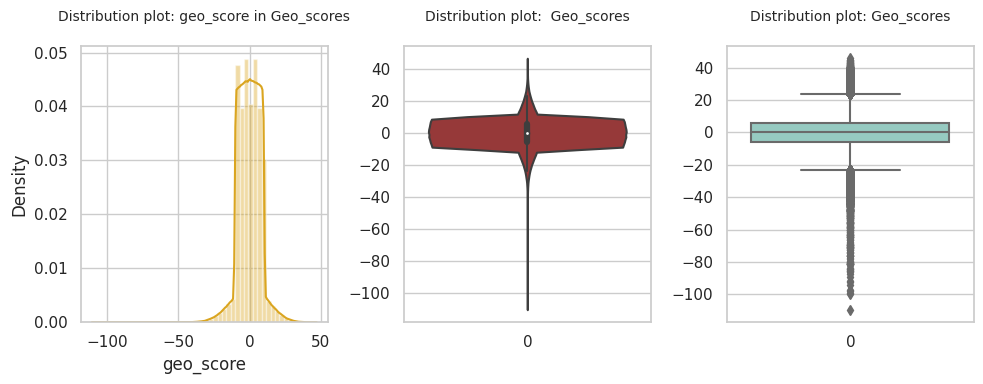

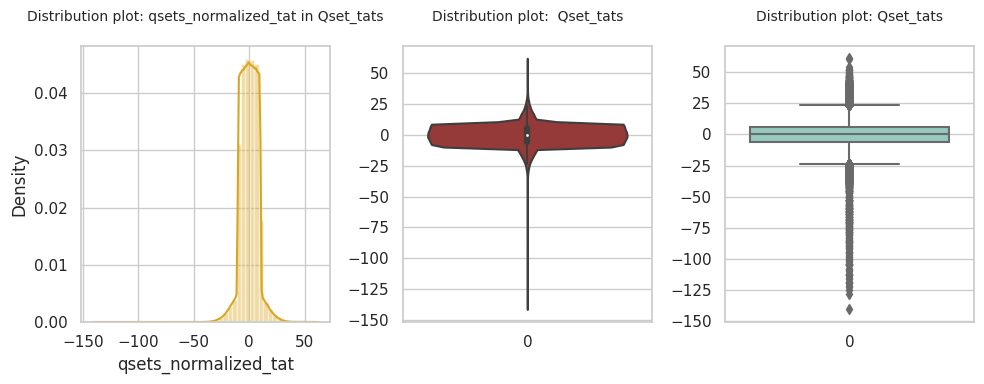

In [12]:
for idx, (name, df) in enumerate(df_list):
    if (df.isnull().any()).values.any():


        fig, ax = plt.subplots(1, 3, figsize=(10, 4))

        col_to_plot = df.columns[1]
        print(f'skewness in {col_to_plot} : ',df[col_to_plot].skew())
        sns.distplot(df[col_to_plot], ax=ax[0], hist=True, kde=True, color='goldenrod')
        ax[0].set_title(f'Distribution plot: {col_to_plot} in {name}\n', fontsize=10)

        sns.violinplot(df[col_to_plot], ax=ax[1], hist=True, kde=True, color='brown')
        ax[1].set_title(f'Distribution plot:  {name}\n', fontsize=10)

        sns.boxplot(data=df[col_to_plot], palette="Set3", ax=ax[2])
        ax[2].set_title(f'Distribution plot: {name}\n', fontsize=10)

        plt.tight_layout()
plt.show()

### - Distribution of missing value columns are skewed

In [13]:

for idx, (name, df) in enumerate(df_list):
    if (df.isnull().any()).values.any():

        col_to_plot = df.columns[1]

        desc = df.describe().T
        desc_data = desc[['mean', '50%']]
        print(name,'\n', desc_data)


Geo_scores 
                     mean        50%
id         142403.000000  142403.00
geo_score      -0.000009       0.18
Qset_tats 
                                mean        50%
id                    142403.000000  142403.00
qsets_normalized_tat       0.000011       0.02


# Missing value imputation :

- `The datasets which are  having misisng values will be imputed with "median" values. `

In [14]:
for idx, (name, df) in enumerate(df_list):
    for col in df.columns:
        if (df[col].isnull().any()):
            print('Columns having null values', col)
            df[col] = df[col].fillna(df[col].median())




Columns having null values geo_score
Columns having null values qsets_normalized_tat


In [15]:
for idx, (name, df) in enumerate(df_list):
    print('Null values in' , name,'\n')
    print(df.isnull().sum())
    print()


Null values in Geo_scores 

id           0
geo_score    0
dtype: int64

Null values in instance_scores 

id                 0
instance_scores    0
dtype: int64

Null values in Lambda_wts 

Group        0
lambda_wt    0
dtype: int64

Null values in Qset_tats 

id                      0
qsets_normalized_tat    0
dtype: int64

Null values in Test 

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64

Null values in Train 

id                0
Group             0
Per1              0
Per2           

In [16]:
for name, df in df_list:
    print(30*'==')
    print(' '*15, name,  '\n','--'*30,'\n', df.nunique())
    #print(30*'--')
    print()

                Geo_scores 
 ------------------------------------------------------------ 
 id           284807
geo_score     25524
dtype: int64

                instance_scores 
 ------------------------------------------------------------ 
 id                 284807
instance_scores     11158
dtype: int64

                Lambda_wts 
 ------------------------------------------------------------ 
 Group        1400
lambda_wt    1400
dtype: int64

                Qset_tats 
 ------------------------------------------------------------ 
 id                      284807
qsets_normalized_tat     24832
dtype: int64

                Test 
 ------------------------------------------------------------ 
 id                56962
Group               915
Per1               1275
Per2               1586
Per3               1095
Per4               1069
Per5               1253
Per6               1092
Per7               1210
Per8               1265
Per9                916
Dem1                699
Dem2    

### - `Geo_scores`, ` instance_scores ` and `Qset_tats ` have similar number of unique ids (= 284807)
### - `Train` has  227845 number of unique ids.
### - `Test` has 56962 number of unique ids.
### - `Lambda_wts` has no id column.

In [17]:
# Adding train and test to check total unique ids:
all_data = pd.concat([train, test], axis =0)
print('unique value in id :', all_data['id'].nunique())
print('unique value in group :', all_data['Group'].nunique())
all_data.shape

unique value in id : 284807
unique value in group : 1400


(284807, 28)

### - combining `id` column of `Train` and `Test`   : $227845 +56962 =284807$,
### - There are 284807 unique  transactions ids.
### - combining `Group` column of `Train` and `Test`   : $1301 +915 =2216$,
### - But there are 1400 unique Groups.

In [18]:
df_list.pop()
df_list.pop()

('Test',
            id   Group      Per1      Per2      Per3      Per4      Per5  \
 0      146574  Grp229 -0.300000  1.540000  0.220000 -0.280000  0.570000   
 1      268759  Grp141  0.633333  0.953333  0.810000  0.466667  0.910000   
 2       59727  Grp188  1.043333  0.740000  0.860000  1.006667  0.583333   
 3      151544  Grp426  1.283333  0.300000  0.576667  0.636667  0.256667   
 4      155008  Grp443  1.186667  0.326667  0.476667  0.866667  0.436667   
 ...       ...     ...       ...       ...       ...       ...       ...   
 56957   18333  Grp102  0.553333  1.043333  1.096667  0.686667  0.673333   
 56958  244207  Grp504  1.353333  0.616667  0.276667  0.783333  0.690000   
 56959  103277   Grp78  1.083333  0.433333  0.806667  0.490000  0.243333   
 56960  273294  Grp134  0.566667  1.153333  0.370000  0.616667  0.793333   
 56961  223337   Grp18  1.426667  0.110000 -0.006667 -0.200000  0.983333   
 
            Per6      Per7      Per8  ...      Dem7      Dem8      Dem9  \
 0

In [19]:
for name, df in df_list:
    for col in df.columns:
        if col == 'id':
            print('---'*25)
            print(name , ':\n')
            print(f'    o Total no. of unique  transaction ids  = ', df[col].nunique())
            print(f'    o Total no. of transaction ids          = ', len(df[col]))
            print()
        elif col == 'Group':
            print('---'*25)
            print(name , ':\n')
            print(f'    o Total no. of unique  transaction ids  = ', df[col].nunique())
            print(f'    o Total no. of transaction ids          = ', len(df[col]))


---------------------------------------------------------------------------
Geo_scores :

    o Total no. of unique  transaction ids  =  284807
    o Total no. of transaction ids          =  1424035

---------------------------------------------------------------------------
instance_scores :

    o Total no. of unique  transaction ids  =  284807
    o Total no. of transaction ids          =  1424035

---------------------------------------------------------------------------
Lambda_wts :

    o Total no. of unique  transaction ids  =  1400
    o Total no. of transaction ids          =  1400
---------------------------------------------------------------------------
Qset_tats :

    o Total no. of unique  transaction ids  =  284807
    o Total no. of transaction ids          =  1424035



## - `Total no of transaction id is more than unique transaction id. This implies there are mupltiple transaction with same transaction id.`

In [20]:
geo1 = geo.groupby('id').mean()
print('--'*45)
print(' =>  After gouping by id , the total no. of transaction ids in "Geo_score" is = ', len(geo1.index))
print('--'*45)
geo1.head()

------------------------------------------------------------------------------------------
 =>  After gouping by id , the total no. of transaction ids in "Geo_score" is =  284807
------------------------------------------------------------------------------------------


,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540


# Combining all dataset for the further analysis:

In [ ]:
for name, df in df_list:
    for col in df.columns:
        if col == 'id':
            df = df.groupby(col).mean()
            all_data = pd.merge(all_data, df, on= col, how ='left')
        elif col =='Group' :
            all_data = pd.merge(all_data, df, on=col, how ='left')



In [ ]:
all_data.shape

In [ ]:
for name, df in df_list:
    for col in df.columns:
        if col == 'id':
            print('---'*25)
            print(name , ':\n')
            print(f'    o Total no. of unique  transaction ids  = ', df[col].nunique())
            print(f'    o Total no. of transaction ids          = ', len(df))
            print()

In [ ]:
all_data.columns

In [ ]:
all_data.head()

# Exploratory Data Analysis (EDA):

                     Total no. of Unique Values
Target                      2
Cred4                     470
Cred2                     507
Cred3                     655
Dem3                      757
Dem2                      770
Dem6                      836
Cred6                     837
Dem9                      851
Dem5                      867
Dem1                      953
Cred5                     971
Dem4                     1034
Per9                     1239
Per4                     1330
lambda_wt                1400
Cred1                    1415
Per3                     1537
Per6                     1568
Dem7                     1619
Dem8                     1638
Per1                     1867
Per5                     2014
Per7                     2022
Per8                     2171
Per2                     2459
instance_scores          4445
geo_score               15066
qsets_normalized_tat    15247
Normalised_FNT          32767
dtype: int64


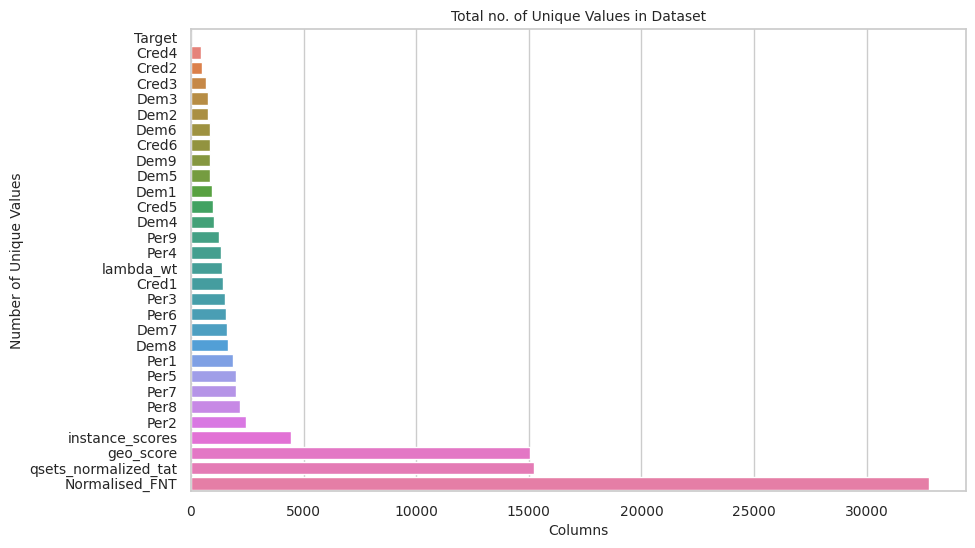

In [26]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique().sort_values()
    print('=='*30)
    print('  '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts)
    print('=='*30)
# Create a bar plot or count plot of unique values

    plt.figure(figsize=(10, 6))
    sns.barplot(y=unique_counts.index, x=unique_counts.sort_values(),palette='husl' )

    plt.xticks(rotation=0, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()

check_unquie_count(all_data.iloc[:,2:])

In [27]:
len(all_data.iloc[:,2:].corr()['Target'])

30

# Finding Correlation

<Axes: >

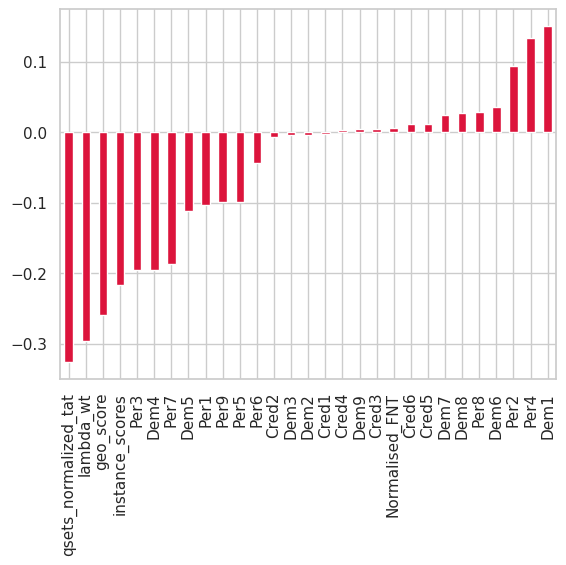

In [28]:
all_data.iloc[:,2:].corr()['Target'].sort_values().head(29).plot(kind='bar', color ='crimson')

# Descriptive Analysis:

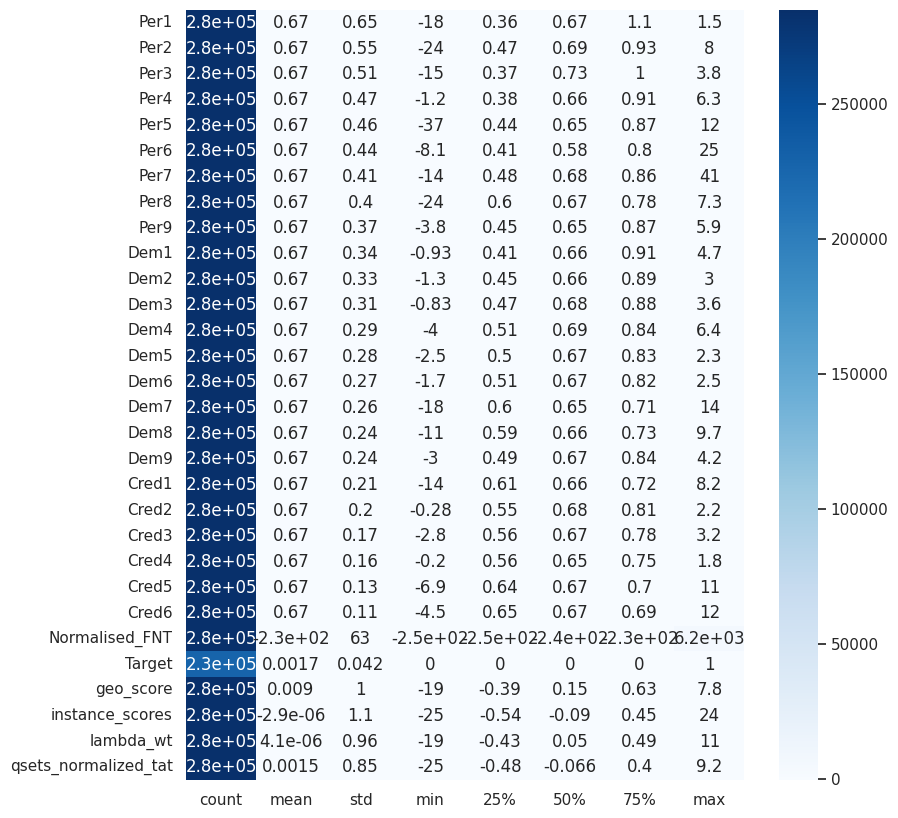

In [29]:
desc = all_data.describe().T
plt.figure(figsize =(9,10))
sns.heatmap(desc.iloc[1:,], annot = True, cmap = 'Blues')
plt.show()

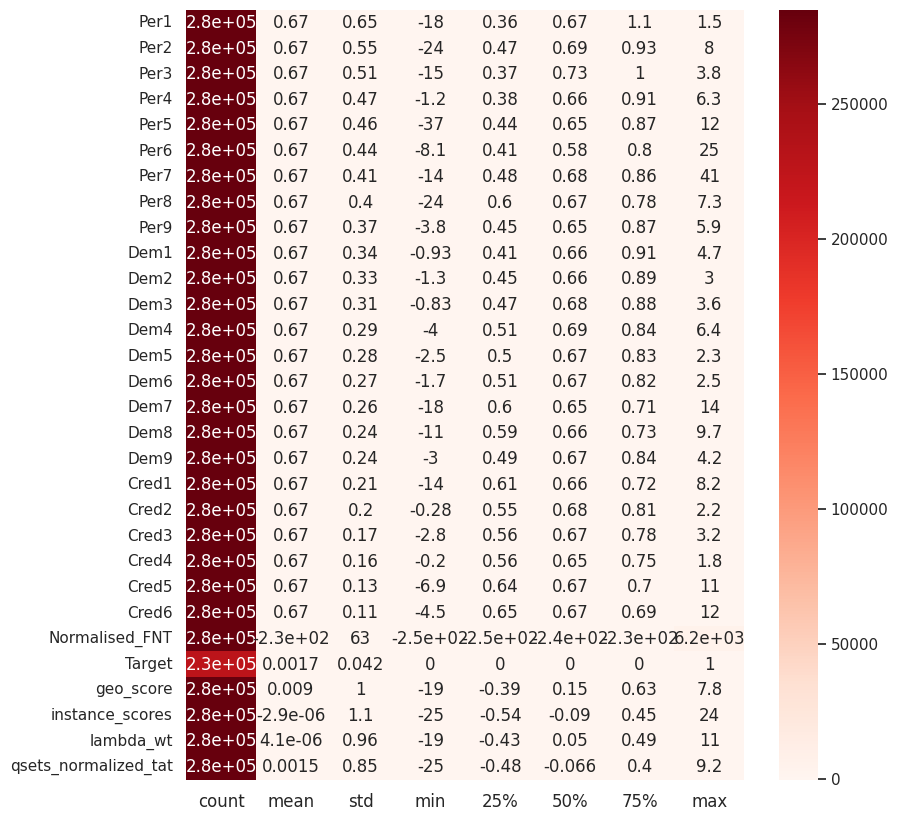

In [30]:
desc[['min','max']]['Range'] = desc['max'] - desc['min']
plt.figure(figsize =(9,10))
sns.heatmap(desc.iloc[1:,], annot = True, cmap = 'Reds')
plt.xticks(fontsize=12)
plt.show()


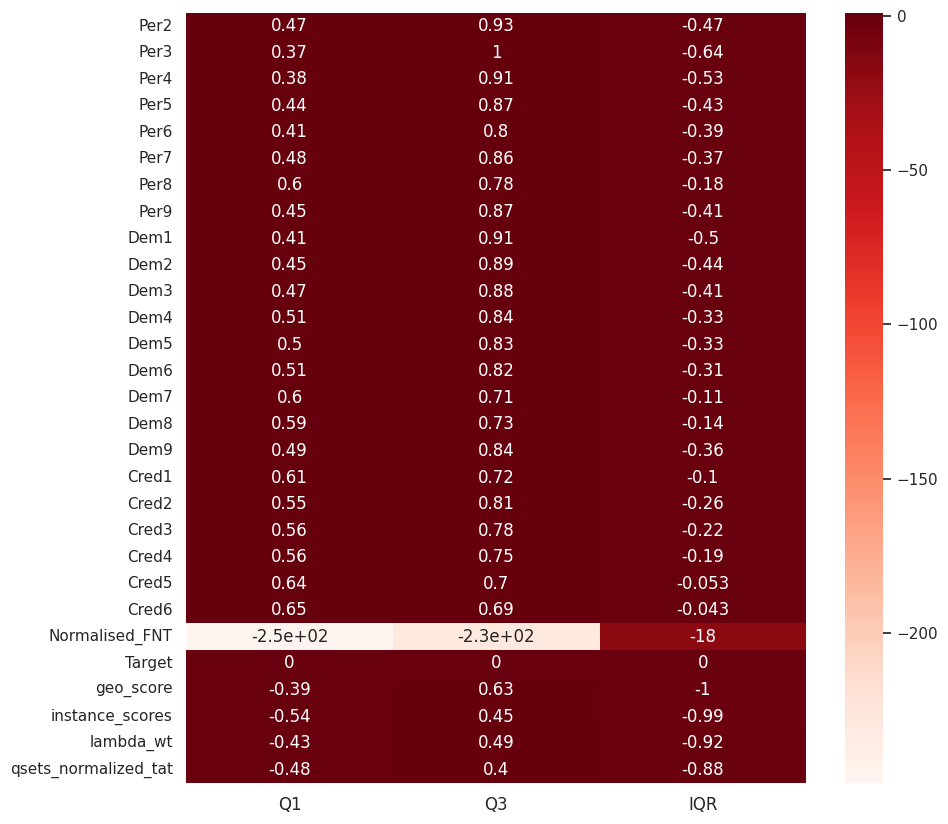

In [31]:

desc['Q1'] = desc[['25%']]
desc['Q3'] = desc[['75%']]
desc['IQR'] =desc['Q1'] - desc['Q3']
plt.figure(figsize =(10,10))
sns.heatmap(desc[['Q1','Q3', 'IQR']].iloc[2:,:], annot = True, cmap = 'Reds')
plt.xticks(fontsize=12)
plt.show()

# Univariate Analysis:

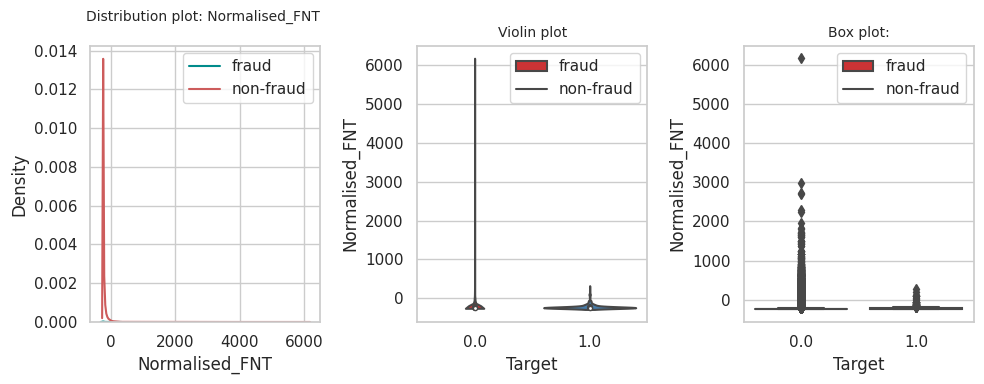

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

col_to_plot = 'Normalised_FNT'

sns.kdeplot(data = all_data, x = col_to_plot, ax=ax[0], hue='Target',  palette=['indianred','darkcyan'], )
ax[0].set_title(f'Distribution plot: {col_to_plot} \n', fontsize=10)
ax[0].legend( labels=['fraud', 'non-fraud'])

sns.violinplot(data = all_data, x= 'Target', y =col_to_plot, ax=ax[1], palette="Set1", )
ax[1].set_title(f'Violin plot', fontsize=10, )
ax[1].legend( labels=['fraud', 'non-fraud'])

sns.boxplot(data=all_data, x='Target', y=col_to_plot, palette="Set1", ax=ax[2])
ax[2].set_title(f'Box plot:', fontsize=10)
ax[2].legend( labels=['fraud', 'non-fraud'])

plt.tight_layout()
plt.show()

In [33]:
all_cols= list(all_data)
all_cols.pop(0)
all_cols.pop(0)
all_cols.remove('Target')

In [34]:
all_cols

['Per1',
 'Per2',
 'Per3',
 'Per4',
 'Per5',
 'Per6',
 'Per7',
 'Per8',
 'Per9',
 'Dem1',
 'Dem2',
 'Dem3',
 'Dem4',
 'Dem5',
 'Dem6',
 'Dem7',
 'Dem8',
 'Dem9',
 'Cred1',
 'Cred2',
 'Cred3',
 'Cred4',
 'Cred5',
 'Cred6',
 'Normalised_FNT',
 'geo_score',
 'instance_scores',
 'lambda_wt',
 'qsets_normalized_tat']

# Filtering fraud and non fraud scenarios:

In [35]:
fraud = all_data[all_data['Target'] ==1]
non_fraud = all_data[all_data['Target'] ==0]
print('Fraud case', len(fraud))
print('Non-Fraud case', len(non_fraud))
fraud_percentage = len(fraud)*100/len(all_data)
print('Fraud percentage =', fraud_percentage)

Fraud case 394
Non-Fraud case 227451
Fraud percentage = 0.13833929643583198


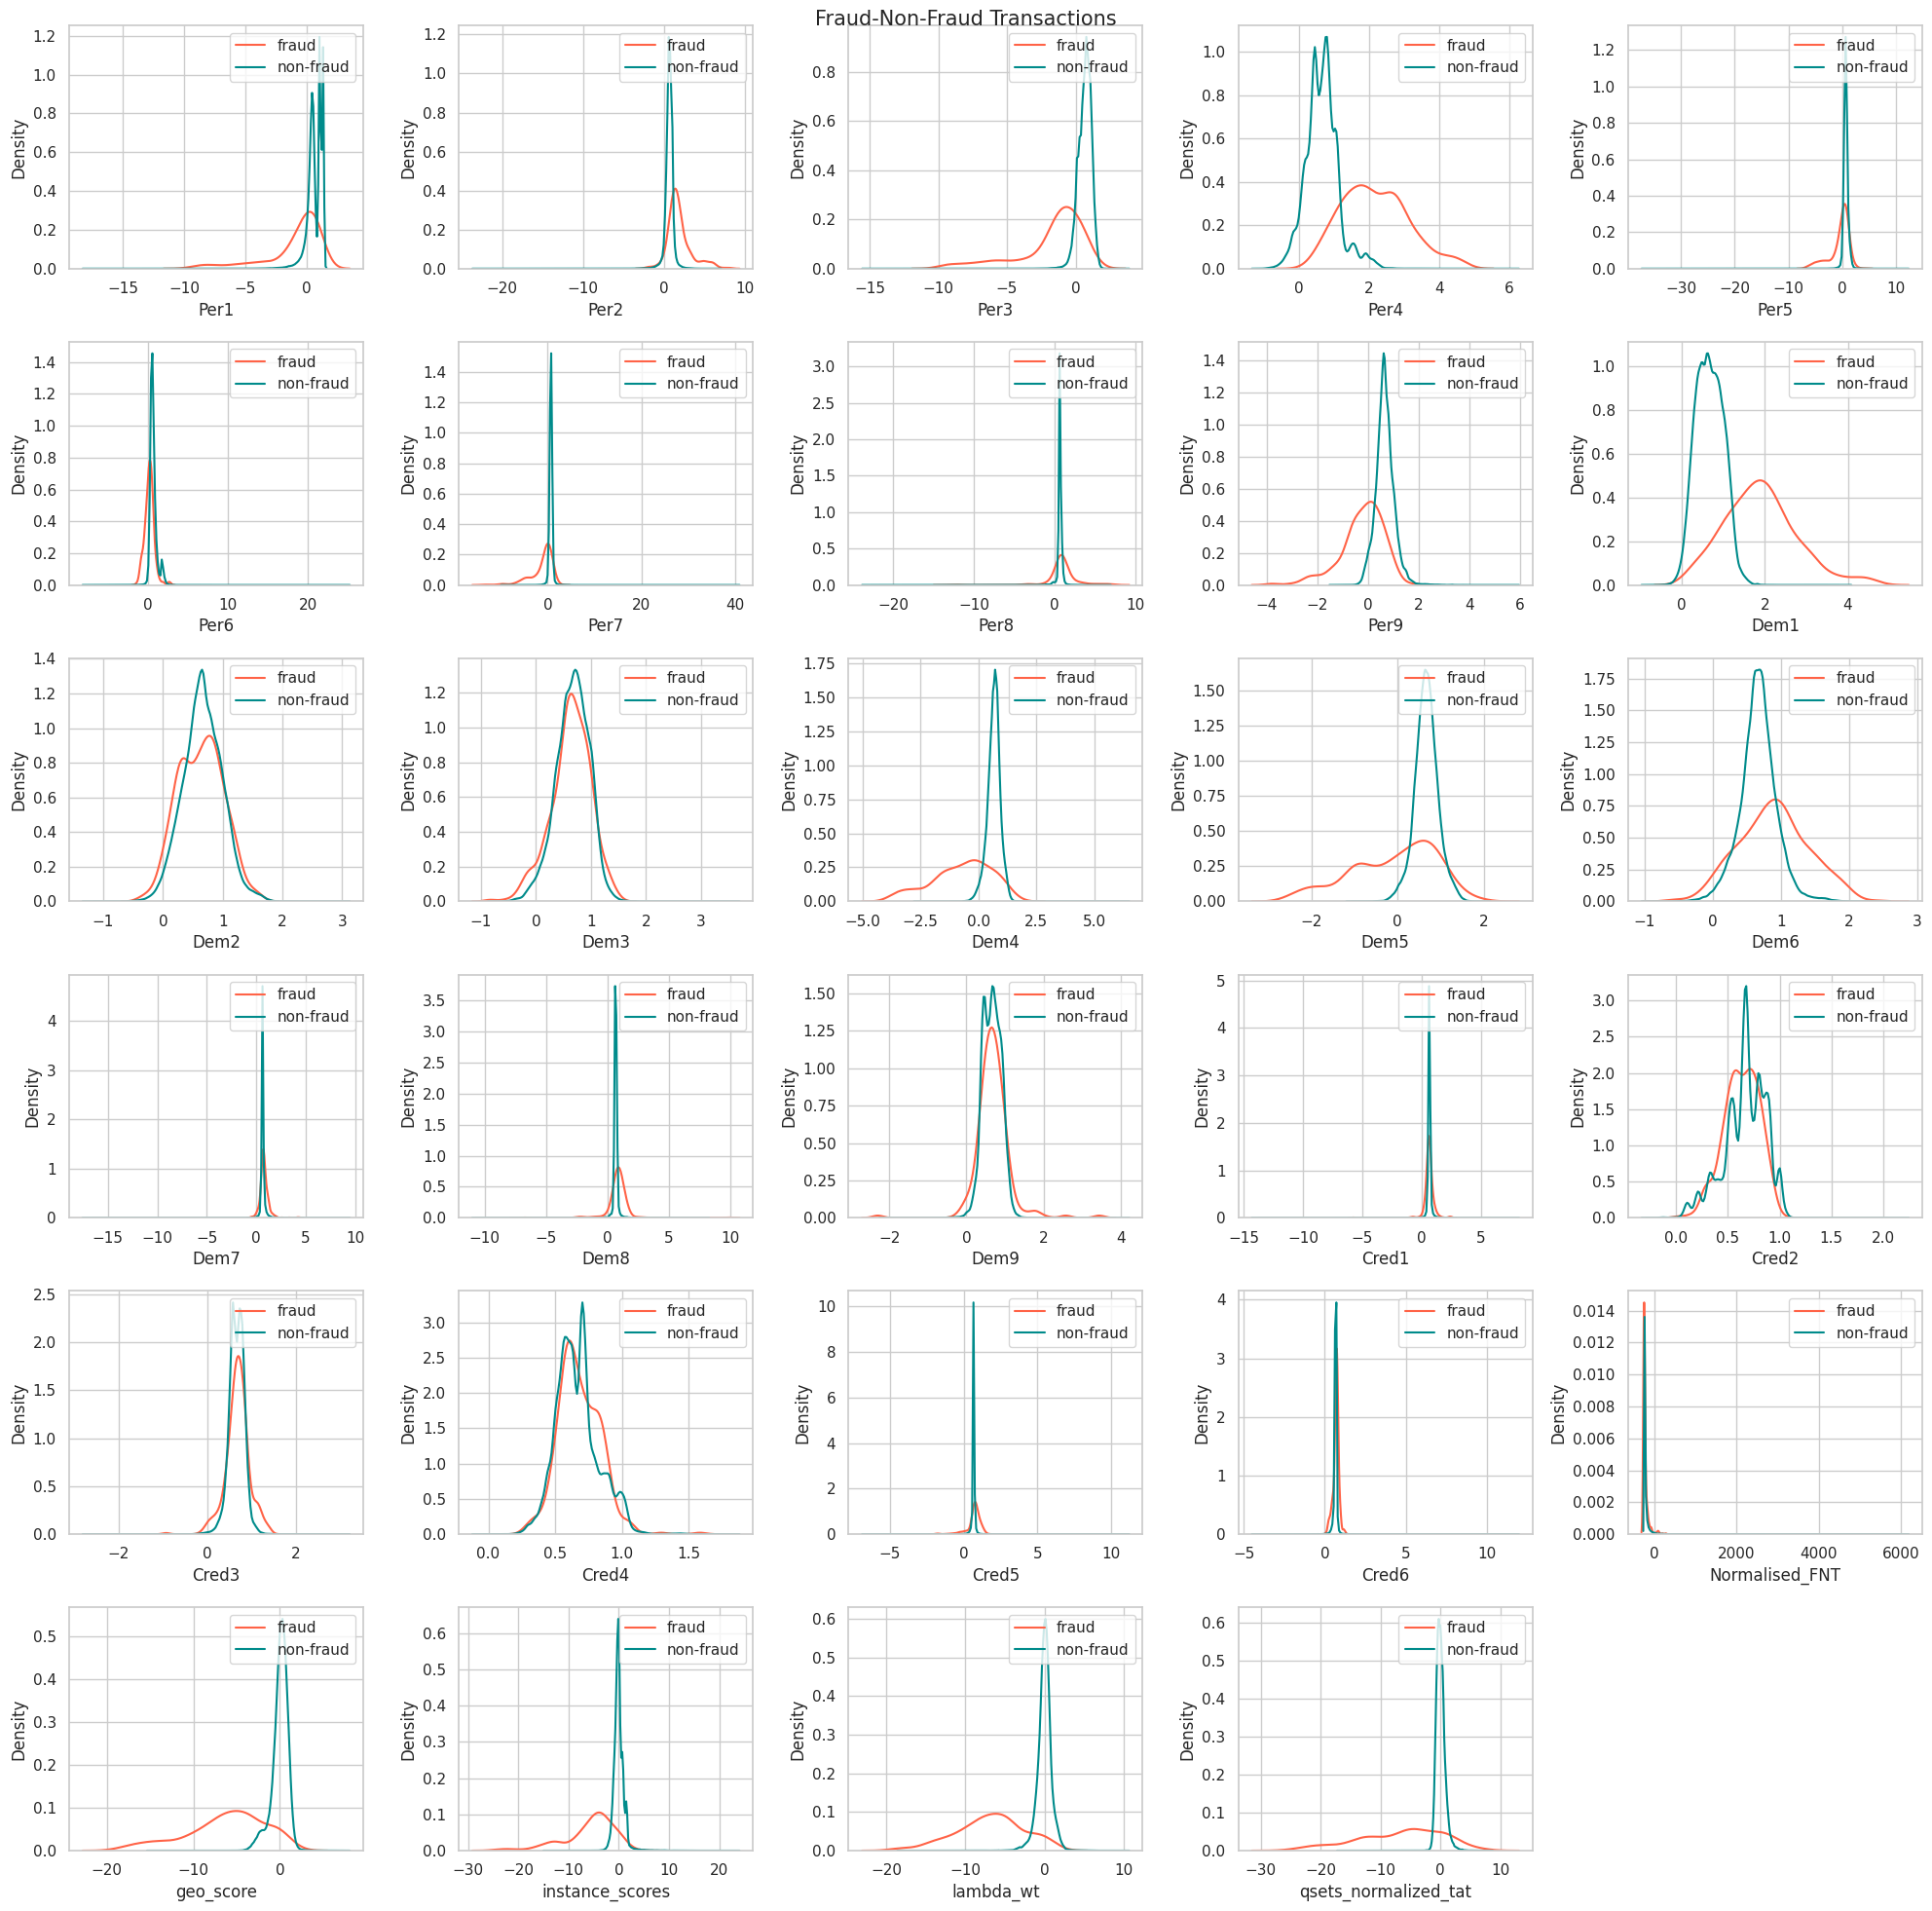

In [36]:
col_to_plot = all_cols
#['geo_score','instance_scores','Normalised_FNT','lambda_wt','sets_normalized_tat']



plt.figure(figsize=(20,20))
#plt.title('Fraud Transactions')
for i, col in enumerate(col_to_plot):
    plt.subplot(6,5,i+1)
    sns.kdeplot(fraud[col],color='tomato',  )
    sns.kdeplot(non_fraud[col],color='darkcyan',)
    plt.legend( labels=['fraud', 'non-fraud'],loc='upper right')
    plt.xlabel(col)
    plt.tight_layout()
    plt.suptitle('Fraud-Non-Fraud Transactions',fontsize = 15)




<Axes: xlabel='Normalised_FNT'>

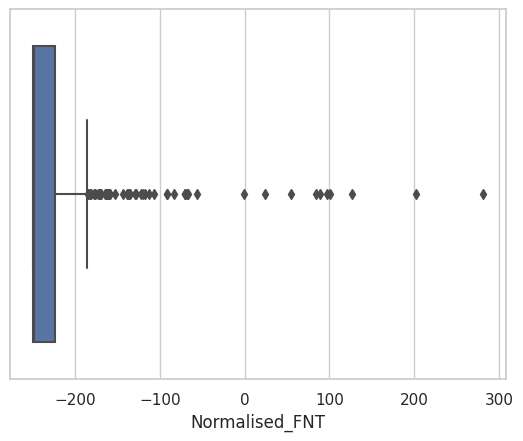

In [37]:
sns.boxplot(data=fraud, x='Normalised_FNT')

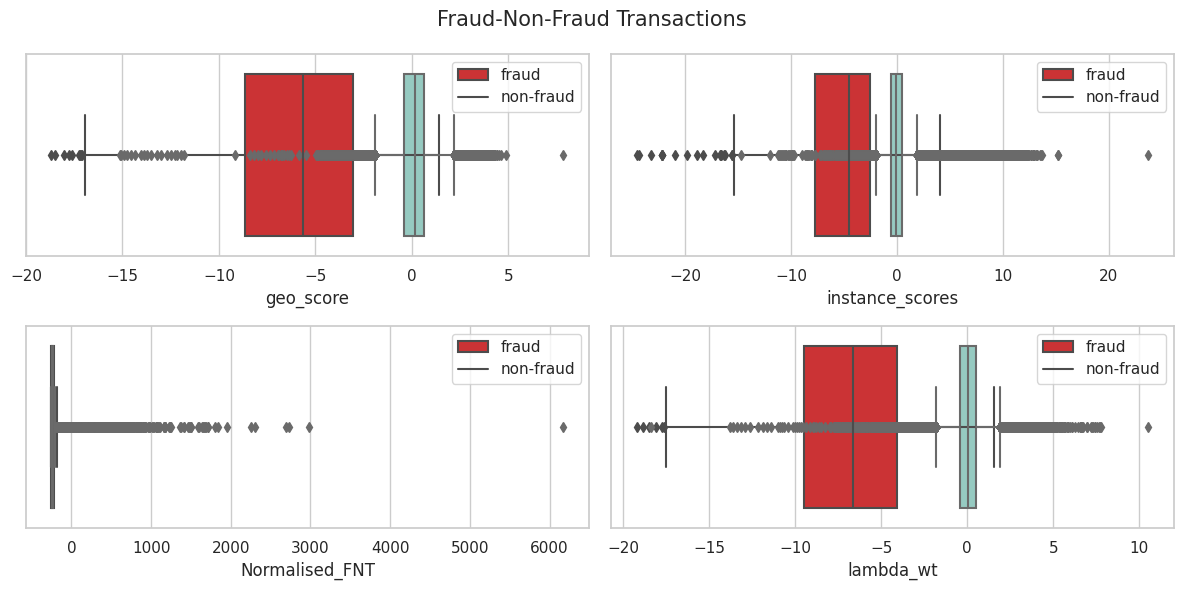

In [38]:
col_to_plot = ['geo_score','instance_scores','Normalised_FNT','lambda_wt']


plt.figure(figsize=(12,6))
#plt.title('Fraud Transactions')
for i, col in enumerate(col_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = fraud, x=col,palette='Set1'  )
    sns.boxplot(data = non_fraud, x=col,palette='Set3' )
    plt.legend( labels=['fraud', 'non-fraud'],loc='upper right')
    plt.xlabel(col)
    plt.tight_layout()
    plt.suptitle('Fraud-Non-Fraud Transactions',fontsize = 15)

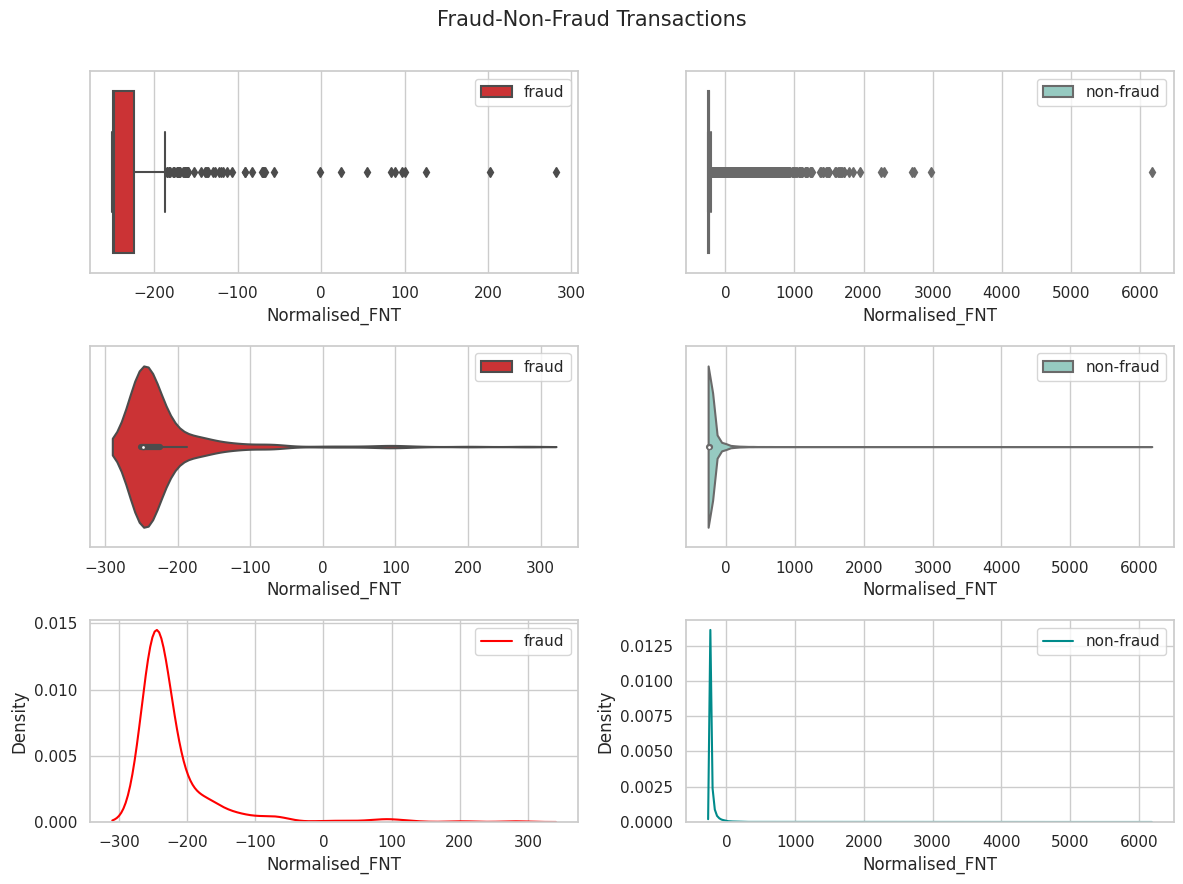

In [39]:
col_to_plot = ['Normalised_FNT',]


plt.figure(figsize=(12,9))
#plt.title('Fraud Transactions')
plt.suptitle('Fraud-Non-Fraud Transactions\n',fontsize = 15)
for i, col in enumerate(col_to_plot):
    plt.subplot(321)
    sns.boxplot(data = fraud, x=col,palette='Set1'  )
    plt.legend( labels=[ 'fraud'],loc='upper right')
    plt.subplot(322)
    sns.boxplot(data = non_fraud, x=col,palette='Set3' )
    plt.legend( labels=[ 'non-fraud'],loc='upper right')
    plt.subplot(323)
    sns.violinplot(data = fraud, x=col,palette='Set1'  )
    plt.legend( labels=[ 'fraud'],loc='upper right')
    plt.subplot(324)
    sns.violinplot(data = non_fraud, x=col,palette='Set3' )
    plt.legend( labels=[ 'non-fraud'],loc='upper right')
    plt.subplot(325)
    sns.kdeplot(fraud[col],  color='red')
    plt.legend( labels=[ 'fraud'],loc='upper right')
    plt.subplot(326)
    sns.kdeplot(non_fraud[col],  color='darkcyan')
    plt.legend( labels=[ 'non-fraud'],loc='upper right')
    plt.xlabel(col)
    plt.tight_layout()


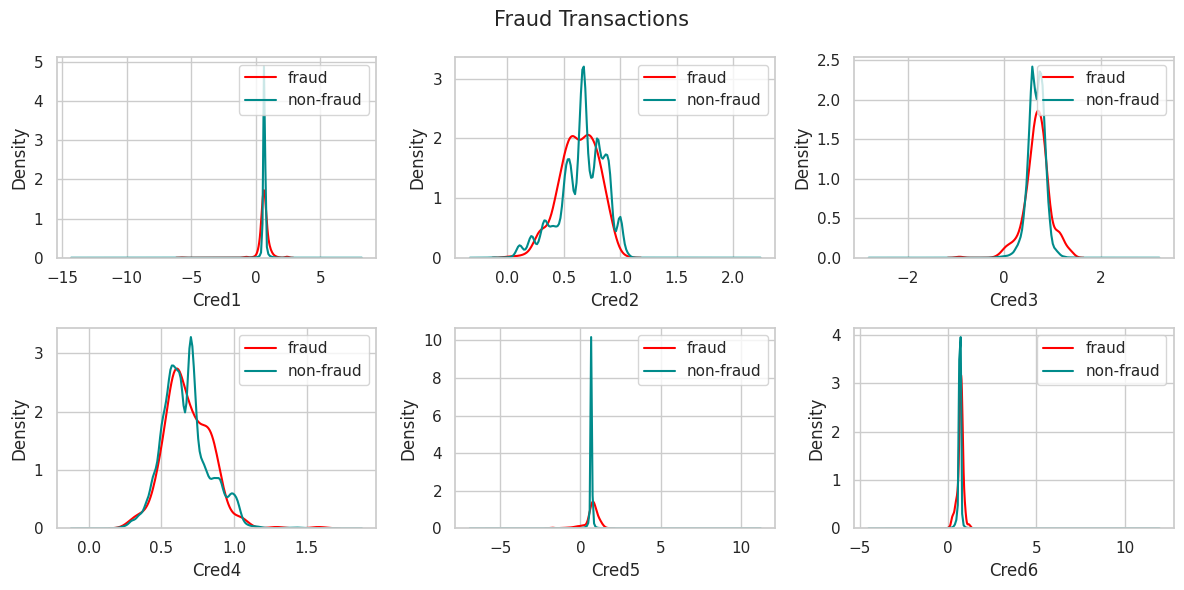

In [40]:
cred_list = ['Cred1', 'Cred2','Cred3','Cred4','Cred5','Cred6']
plt.figure(figsize=(12,6))
plt.title('Fraud Transactions')
for i, cred in enumerate(cred_list):
    plt.subplot(2,3,i+1)
    sns.kdeplot(fraud[cred],  color='red')
    sns.kdeplot(non_fraud[cred],color='darkcyan',)
    plt.legend( labels=['fraud', 'non-fraud'],loc='upper right')
    plt.xlabel(cred)
    plt.tight_layout()
    plt.suptitle('Fraud Transactions',fontsize = 15)

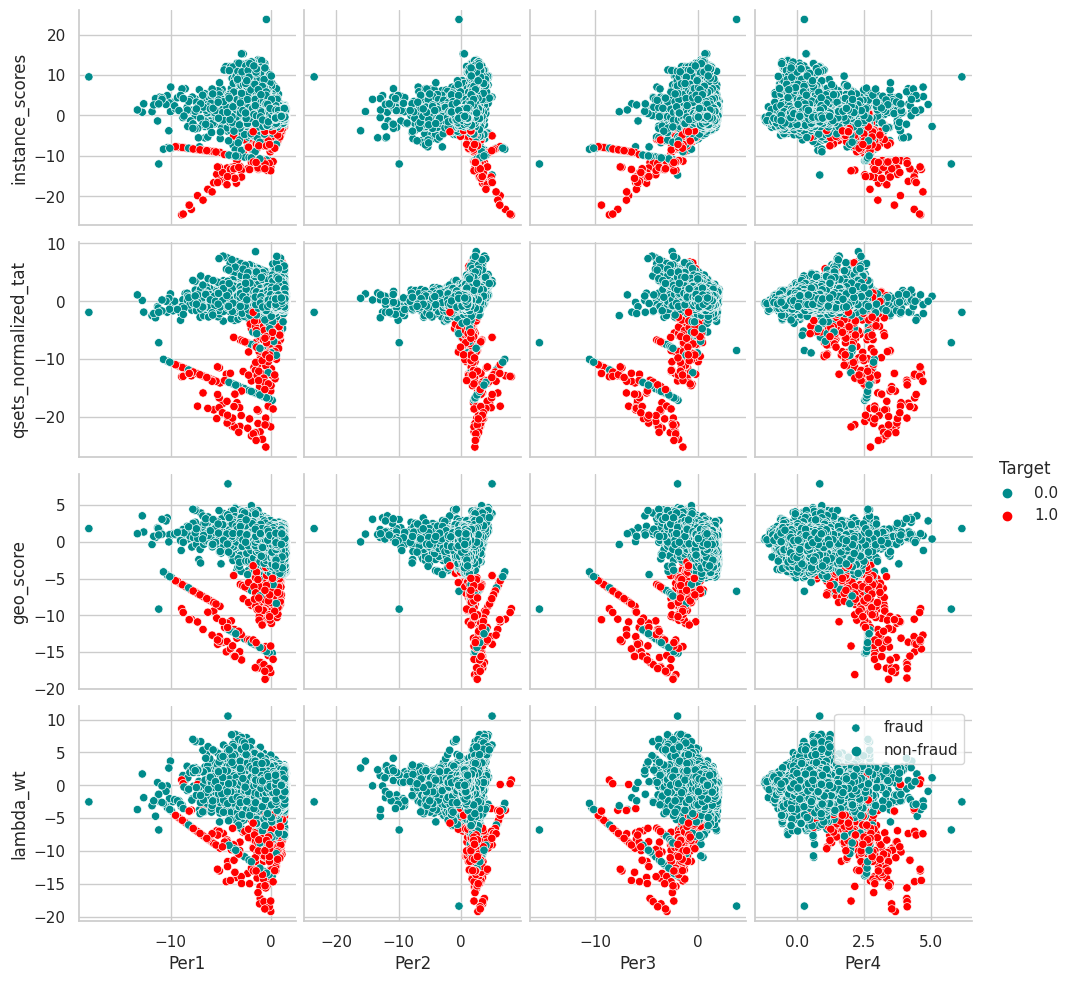

In [42]:
custom_palette =['darkcyan','red']
sns.pairplot(all_data, hue ='Target', palette = custom_palette, #hsv_r. gnuplot2_r
    x_vars=['Per1', "Per2", "Per3",'Per4'],
    y_vars=['instance_scores', "qsets_normalized_tat", "geo_score",'lambda_wt'],
)
plt.legend( labels=['fraud', 'non-fraud'])
plt.show()

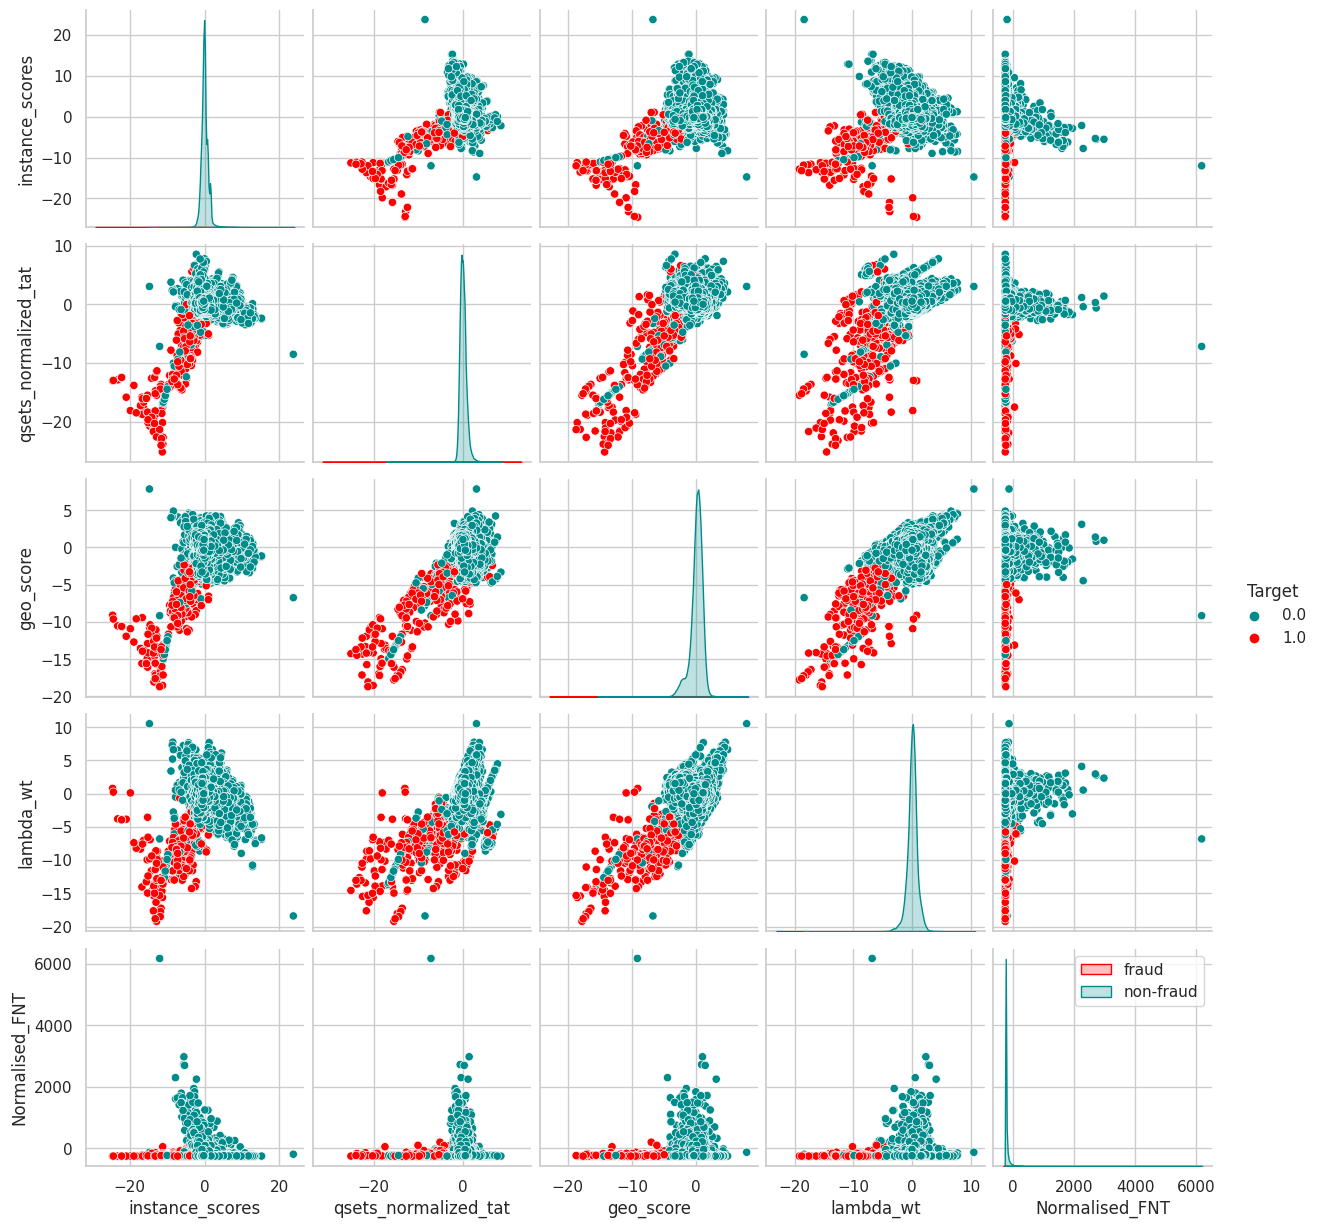

In [43]:
sns.pairplot(all_data, hue ='Target', palette =custom_palette,
    x_vars=['instance_scores', "qsets_normalized_tat", "geo_score",'lambda_wt','Normalised_FNT'],
    y_vars=['instance_scores', "qsets_normalized_tat", "geo_score",'lambda_wt','Normalised_FNT'],
)
plt.legend( labels=['fraud', 'non-fraud'])
plt.show()

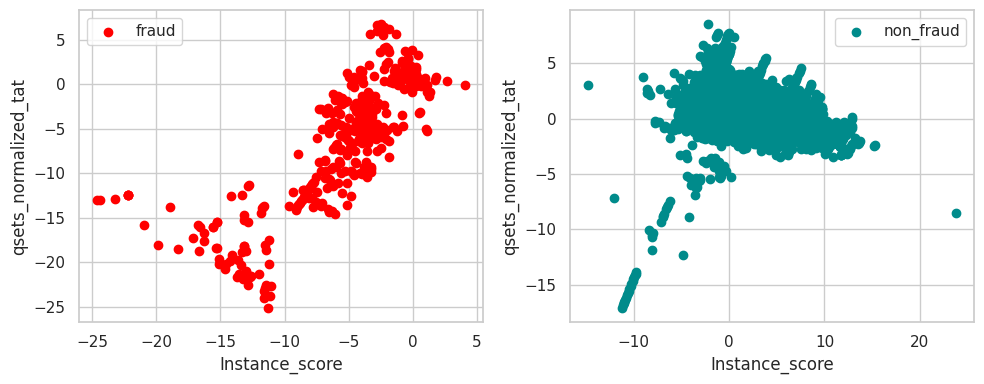

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(fraud.instance_scores, fraud.qsets_normalized_tat,color ='red', label ='fraud')
plt.legend()
plt.xlabel('Instance_score')
plt.ylabel('qsets_normalized_tat')
plt.subplot(1,2,2)
plt.scatter(non_fraud.instance_scores, non_fraud.qsets_normalized_tat,color ='darkcyan' ,  label ='non_fraud')
plt.legend()
plt.xlabel('Instance_score')
plt.ylabel('qsets_normalized_tat')
plt.tight_layout()
plt.show()

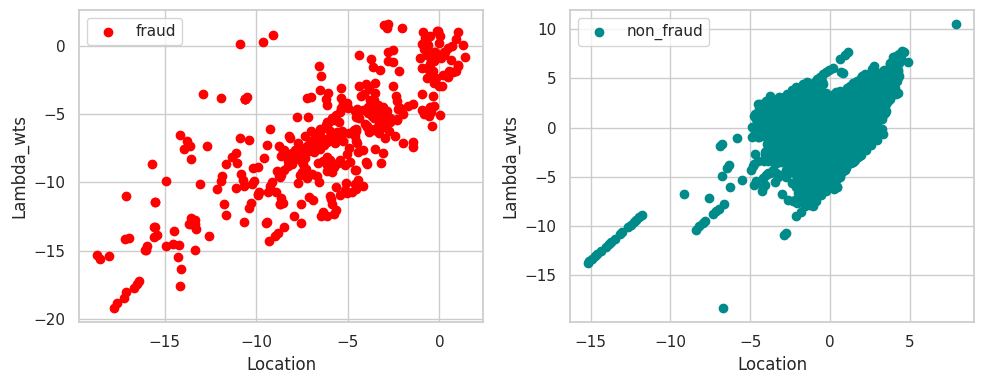

In [45]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(fraud.geo_score, fraud.lambda_wt, color ='red',label ='fraud')
plt.legend()
plt.xlabel('Location')
plt.ylabel('Lambda_wts')
plt.subplot(1,2,2)
plt.scatter(non_fraud.geo_score, non_fraud.lambda_wt, color ='darkcyan',  label ='non_fraud')
plt.legend()
plt.xlabel('Location')
plt.ylabel('Lambda_wts')
plt.tight_layout()
plt.show()

In [46]:
fraud[['Normalised_FNT']].describe().T[['min', 'max']]

,min,max
Normalised_FNT,-250.0,281.4675


In [47]:
non_fraud[['Normalised_FNT']].describe().T[['min', 'max']]

,min,max
Normalised_FNT,-250.0,6172.79


# Splitting train and test

In [48]:
test = all_data[all_data.isnull().any(axis=1)]
test.drop('Target', inplace =True, axis =1)
test

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.250,-0.04,0.76,-0.426
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.430,-0.77,0.18,-0.620
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.320,0.11,0.39,-0.406
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.110,0.33,1.80,0.374
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.110,-0.37,1.89,-0.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,-0.114,-0.51,-0.40,0.010
284803,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,0.110,-0.46,-1.54,0.064
284804,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,-0.530,0.65,0.29,-0.020
284805,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,0.270,-0.92,-0.69,0.610


In [49]:
train = all_data.dropna()
train

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,0.256,-0.06,-0.13,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,-0.250,0.52,0.66,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,-0.950,1.56,-0.51,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,0.490,0.70,0.72,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,0.850,-0.47,0.60,-0.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.646667,0.533333,0.680000,0.693333,-246.5025,0.0,-0.140,-0.44,0.75,-0.546
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.596667,0.730000,0.646667,0.656667,-249.7775,0.0,0.426,-0.40,-0.98,0.384
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.700000,0.696667,0.663333,0.673333,-249.7775,0.0,1.066,-0.13,0.15,0.010
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.906667,0.540000,0.766667,0.710000,-242.7500,0.0,-3.290,-0.66,1.53,0.384


### -  For Model building `id` and `Group` are not mandetory.

In [50]:
train = train.drop(['id', 'Group',], axis = 1)
test = test.drop(['id', 'Group',], axis = 1)

# **STEP- 4 Data Engineering**

- [ ] Handling missing value
- [ ] Outlier Treatment
- [ ] Encoding
- [ ] Feature Scaling
- [ ] Imbalance Treatmnet

## - splitting the train data into target and dependent variable

In [51]:

y = train[['Target']]
x = train.drop(['Target'], axis=1)


In [52]:
x.isnull().sum()

Per1                    0
Per2                    0
Per3                    0
Per4                    0
Per5                    0
Per6                    0
Per7                    0
Per8                    0
Per9                    0
Dem1                    0
Dem2                    0
Dem3                    0
Dem4                    0
Dem5                    0
Dem6                    0
Dem7                    0
Dem8                    0
Dem9                    0
Cred1                   0
Cred2                   0
Cred3                   0
Cred4                   0
Cred5                   0
Cred6                   0
Normalised_FNT          0
geo_score               0
instance_scores         0
lambda_wt               0
qsets_normalized_tat    0
dtype: int64

In [53]:
x.head()


,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,lambda_wt,qsets_normalized_tat
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.13,-0.700
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.66,0.140
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.51,-0.430
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,0.72,-0.302
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,0.60,-0.630


In [54]:
Q1 = x['Normalised_FNT'].quantile(0.25)
Q3 = x['Normalised_FNT'].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound, lower_bound)

-203.94875 -275.41875000000005


In [55]:
positive_outlier = x['Normalised_FNT'] >= upper_bound
negative_outlier = x['Normalised_FNT'] <= lower_bound


In [56]:
len(x['Normalised_FNT'])

227845

In [57]:
len(x['Normalised_FNT'][ positive_outlier ] )

25486

In [58]:
len(x['Normalised_FNT'][ negative_outlier ] )

0

In [59]:
len(x['Normalised_FNT']) - len(x['Normalised_FNT'][ positive_outlier ] )

202359

### This outlier is important for the analysis of Fradulent detection.

# **STEP- 5: Model Building**
## Important Libraries for Modeling

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve , auc

### Feature Scaling

In [61]:
sc= StandardScaler()
sc_x =sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.617603,-0.159949,-0.367953,0.211843,1.228044,2.982542,-0.786549,0.855995,0.536498,-0.606800,...,1.699950,1.530275,-0.395173,0.148061,0.058750,-0.287254,0.247680,-0.054858,-0.136071,-0.824951
1,-0.294547,0.982970,0.428588,1.617345,0.129918,-0.091573,0.344195,0.291510,-1.300520,-0.577426,...,0.117386,-0.612816,0.019414,-0.834050,-0.120443,-0.323573,-0.259523,0.476528,0.688603,0.163090
2,0.709328,-0.956345,0.553665,-1.151282,-1.271637,0.380791,-1.468203,0.225099,-1.200485,-0.019317,...,-1.399237,0.554403,0.019414,0.148061,0.058750,-0.083466,-0.961188,1.429358,-0.532749,-0.507366
3,-0.044852,0.770192,0.165269,0.579109,0.166041,-0.721392,0.697051,-0.082047,-0.491141,1.263355,...,0.892183,-1.397341,-0.913407,1.326595,0.835249,-0.352265,0.482237,0.641441,0.751236,-0.356808
4,-0.162056,0.630367,-0.144132,-0.529754,0.231062,-0.466465,0.448448,0.324715,-0.409294,0.264633,...,-0.690380,-0.842433,0.309624,0.295378,0.058750,-0.316753,0.843093,-0.430493,0.625969,-0.742614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,-0.289451,0.630367,-0.256042,-0.190738,1.603719,2.652637,-0.161031,1.088431,-0.845813,-0.401181,...,1.634010,-0.115313,-0.830490,0.098955,0.237942,-0.299401,-0.149262,-0.403008,0.782553,-0.643810
227841,1.066035,0.113622,-1.197409,0.233031,0.469470,-0.451469,0.159747,-0.189964,0.381897,-0.675340,...,0.315207,-0.402334,0.392542,-0.146572,-0.090577,-0.352265,0.418084,-0.366360,-1.023378,0.450093
227842,0.602316,0.162257,0.474669,0.487293,-0.354124,-0.608924,0.039455,-0.115252,-0.100093,0.597541,...,1.024063,0.190843,0.185248,-0.023808,0.058750,-0.352265,1.059607,-0.118991,0.156219,0.010179
227843,-0.355697,0.630367,0.981559,0.579109,0.570614,0.523250,0.352214,0.133785,0.963923,-0.743880,...,-0.113404,1.377197,-0.789031,0.737328,0.387269,-0.238829,-3.306754,-0.604568,1.596787,0.450093


## Imbalance Treatment

In [62]:
y.value_counts()

Target
0.0       227451
1.0          394
dtype: int64

In [63]:
# percentage of Fradulent and Non- Fradulent
y.value_counts()*100/len(y)

Target
0.0       99.827075
1.0        0.172925
dtype: float64

In [64]:
y[y['Target']==1.0].value_counts()*100/len(y)

Target
1.0       0.172925
dtype: float64

Text(0.5, 0, 'Fraud')

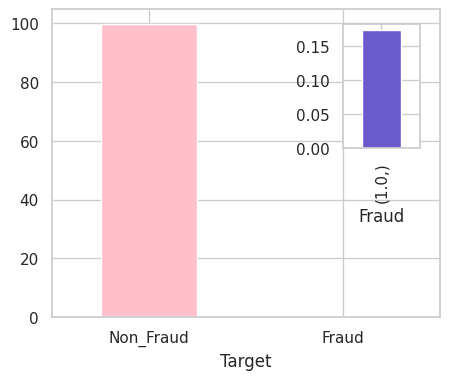

In [65]:
fig, ax1 = plt.subplots(figsize=(5,4))
ax2=ax1.inset_axes([0.75,0.55,0.2,0.4])
(y.value_counts()*100/len(y)).round(2).plot(kind='bar', color=['pink','slateblue'],ax=ax1)
plt.xticks(ticks=[0, 1], labels=['Non_Fraud', 'Fraud'], rotation=0)
(y[y['Target']==1.0].value_counts()*100/len(y)).plot(kind='bar', color='slateblue', ax=ax2)
ax2.set_xlabel('Fraud')

### -  There are 0.17 % of fradulent case observed in dataset

Text(0, 0.5, '')

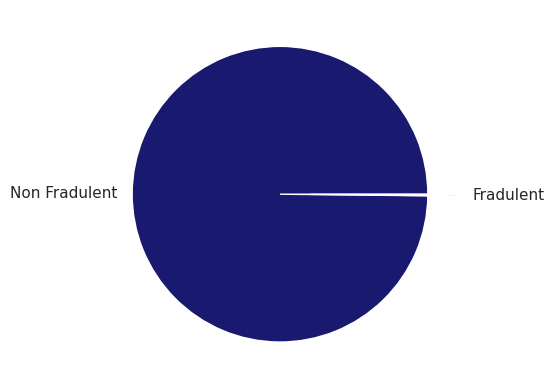

In [66]:
(y.value_counts()*100/len(y)).plot(kind='pie',
                                   labels =['Non Fradulent', 'Fradulent'],
                                   explode= [0,0.2],
                                   colors =['midnightblue','skyblue',])
plt.ylabel('')

### - This Dataset is highly imbalanced.

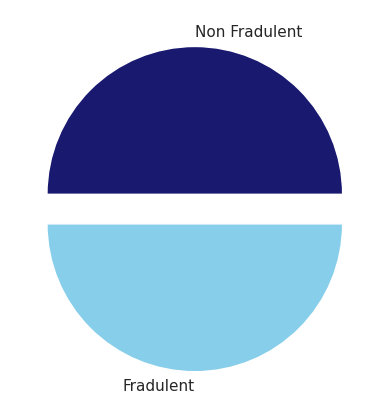

Shape of x and y after oversampling with SMOTE : 
shape of x : (454902, 29) 
shape of y : (454902, 1)


In [67]:
smote = SMOTE()
x_smote, y_smote =smote.fit_resample(sc_x,y)
(y_smote.value_counts()*100/len(y)).plot(kind='pie',
                                   labels =['Non Fradulent', 'Fradulent'],
                                   explode= [0,0.2],
                                   colors =['midnightblue','skyblue',])
plt.ylabel('')
plt.show()
print('Shape of x and y after oversampling with SMOTE : ' )
print('shape of x :', x_smote.shape, '\nshape of y :',y_smote.shape)

## **Approach  1 : Handled imbalance treatment**
- [x] Handling missing value
- [ ] Outlier Treatment
- [x] Encoding
- [x] Feature Scaling
- [x] Imbalance Treatmnet

In [68]:
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.7, random_state= 12, stratify =y )
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.3, random_state= 12, stratify =y_smote )

### 1. Logistic Regression

Model Name : Logistic Regression
▬ Training Accuracy(CrossValidation), 94.0 %

------------------------------------------------------------
Classification_report:Logistic Regression

------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     68235
         1.0       0.97      0.91      0.94     68236

    accuracy                           0.94    136471
   macro avg       0.94      0.94      0.94    136471
weighted avg       0.94      0.94      0.94    136471

Test confusion matrix :
 [[66396  1839]
 [ 6213 62023]]

Test ROC-AUC : 0.94


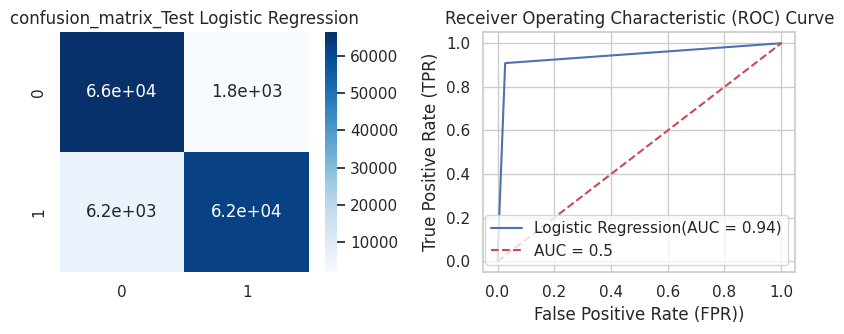

In [69]:
#=================================
model_name = 'Logistic Regression'
print('==='*10)
print('Model Name :', model_name )
print('==='*10)
#=================================
clf1 = LogisticRegression()
clf1.fit(x_train,y_train)
y_pred_train = clf1.predict(x_train)
y_pred_test = clf1.predict(x_test)

#=======================================================
#            Cross Validation
#--------------------------------------------------------
CV_train_acc_logit =(cross_val_score(clf1, x_smote, y_smote, cv =10).mean()).round(2)*100
print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc_logit} %' )
print()
#=====================================================
#           Evalutaion Metrics
#-----------------------------------------------------


cm_test = confusion_matrix(y_test, y_pred_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
roc_auc_logit = auc(fpr, tpr)
#---------------------------------------------------------

print( '--'*30)
print( f'Classification_report:{model_name}\n')

print( '--'*30)
print(classification_report(y_test, y_pred_test))
#print( '--'*30)
print(f'Test confusion matrix :\n {cm_test}')
print()
print(f'Test ROC-AUC : {roc_auc_logit.round(2)}')

plt.figure(figsize = (8,3.5))
plt.subplot(1,2,1)
sns.heatmap(cm_test, annot = True, cmap= 'Blues')
plt.title(f'confusion_matrix_Test {model_name}')

plt.subplot(1,2,2)
plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc_logit:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

plt.plot([0, 1], [0, 1], 'r--', label='AUC = 0.5')

# Set labels and title

plt.xlabel('False Positive Rate (FPR))')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
# Show the plot
plt.show()

Model Name : Gradient Boost
▬ Training Accuracy(CrossValidation), 98.0 %

------------------------------------------------------------
Classification_report:Gradient Boost

------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     68235
         1.0       0.99      0.97      0.98     68236

    accuracy                           0.98    136471
   macro avg       0.98      0.98      0.98    136471
weighted avg       0.98      0.98      0.98    136471

Test confusion matrix :
 [[67381   854]
 [ 1960 66276]]

Test ROC-AUC : 0.98


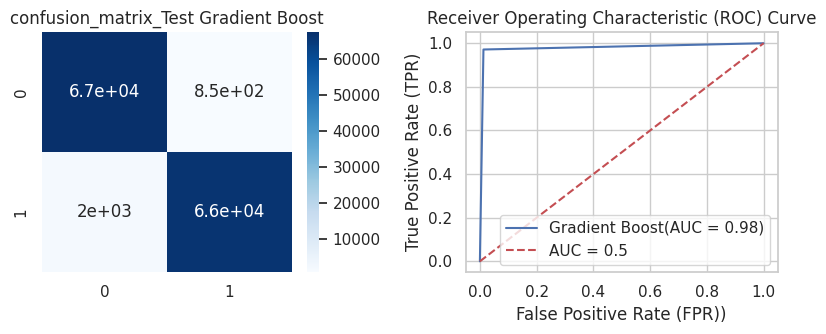

In [75]:
#===========================
model_name ='Gradient Boost'
print('==='*10)
print('Model Name :', model_name )
print('==='*10)
#===========================
clf2 = GradientBoostingClassifier()
clf2.fit(x_train,y_train)
y_pred_train = clf2.predict(x_train)
y_pred_test = clf2.predict(x_test)

#=======================================================
#            Cross Validation
#--------------------------------------------------------
CV_train_acc_gbc =(cross_val_score(clf2, x_smote, y_smote, cv =3).mean()).round(2)*100
print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc_gbc} %' )
print()
#=====================================================
#           Evalutaion Metrics
#-----------------------------------------------------


cm_test = confusion_matrix(y_test, y_pred_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_test, pos_label=1)
roc_auc_gbc = auc(fpr, tpr)
#---------------------------------------------------------

print( '--'*30)
print( f'Classification_report:{model_name}\n')

print( '--'*30)
print(classification_report(y_test, y_pred_test))
#print( '--'*30)
print(f'Test confusion matrix :\n {cm_test}')
print()
print(f'Test ROC-AUC : {roc_auc_gbc.round(2)}')

plt.figure(figsize = (8,3.5))
plt.subplot(1,2,1)
sns.heatmap(cm_test, annot = True, cmap= 'Blues')
plt.title(f'confusion_matrix_Test {model_name}')

plt.subplot(1,2,2)
plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc_gbc:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

plt.plot([0, 1], [0, 1], 'r--', label='AUC = 0.5')

# Set labels and title

plt.xlabel('False Positive Rate (FPR))')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
# Show the plot
plt.show()



### **Approach-2 Using Anonamly Detection Algorithm**

- [x] Handling missing value
- [ ] Outlier Treatment
- [ ] Encoding
- [ ] Feature Scaling
- [ ] Imbalance Treatmnet


In [71]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import  OneClassSVM

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state= 12,stratify=y)


In [72]:
fraud_percent = len(fraud)*100/len(x)
print('Percentage of Fraud :',fraud_percent)


Percentage of Fraud : 0.17292457591783889


### 1. Isolation Forest:

Model_name :  Isolation Forest
Accuracy score :  0.8284711097456604
Errors : Target    39082
dtype: int64

Classification Report :
               precision    recall  f1-score   support

         0.0       1.00      0.83      0.91    227451
         1.0       0.01      0.90      0.02       394

    accuracy                           0.83    227845
   macro avg       0.50      0.87      0.46    227845
weighted avg       1.00      0.83      0.90    227845


confusion matrix :
 [[188407  39044]
 [    38    356]]

Test ROC-AUC : 0.87


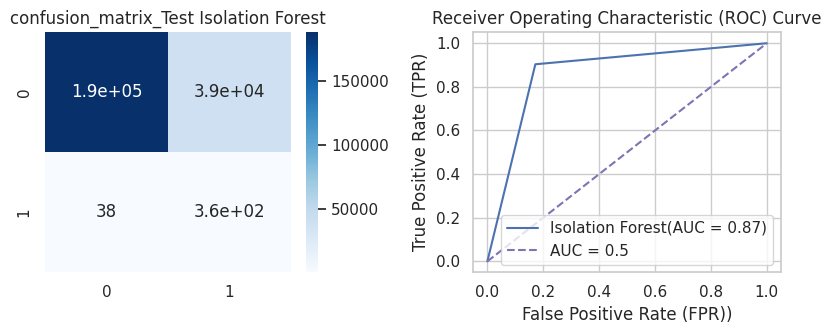

In [73]:
ifc = IsolationForest( contamination=fraud_percent ,random_state=42,)
model_name = 'Isolation Forest'
print('Model_name : ', model_name)
ifc.fit(x)
scores_prediction_ifc = ifc.decision_function(x)

y_pred_ifc = ifc.predict(x)

y_pred =y_pred_ifc.reshape(-1,1)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

accuracy_score_ifc = accuracy_score(y,y_pred)
print('Accuracy score : ', accuracy_score_ifc)

n_errors_ifc = (y_pred != y).sum()
cr_ifc = classification_report(y,y_pred)
cm_ifc = confusion_matrix(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred_ifc, pos_label=1)
roc_auc = auc(fpr, tpr)


print('Errors :',  n_errors_ifc)
print()
print("Classification Report :\n", cr_ifc)
print()
print("confusion matrix :\n",cm_ifc)
print()
print(f'Test ROC-AUC : {roc_auc:.2f}')
#=================Ploting confucion matrix and ROC charecteristics ============
plt.figure(figsize = (8,3.5))
plt.subplot(1,2,1)
sns.heatmap(cm_ifc, annot = True, cmap= 'Blues')
plt.title(f'confusion_matrix_Test {model_name}')
#------------------------------------------------------
plt.subplot(1,2,2)
plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')
plt.xlabel('False Positive Rate (FPR))')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
# Show the plot
plt.show()


### 2. Local Outlier Factor:

Model_name :  LocalOutlierFactor
Accuracy score :  0.8265926397331519
Errors : Target    39510
dtype: int64

Classification Report :
               precision    recall  f1-score   support

         0.0       1.00      0.83      0.91    227451
         1.0       0.00      0.36      0.01       394

    accuracy                           0.83    227845
   macro avg       0.50      0.59      0.46    227845
weighted avg       1.00      0.83      0.90    227845


confusion matrix :
 [[188193  39258]
 [   252    142]]

Test ROC-AUC : 0.59


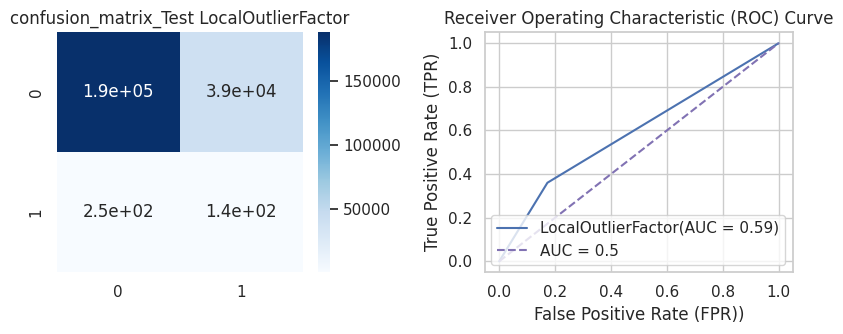

In [74]:
lof = LocalOutlierFactor(contamination=fraud_percent)
model_name = 'LocalOutlierFactor'
print('Model_name : ', model_name)
lof.fit(x)
y_pred_lof = lof.fit_predict(x)
scores_prediction_lof = lof.negative_outlier_factor_

y_pred =y_pred_lof.reshape(-1,1)
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

accuracy_score_lof = accuracy_score(y,y_pred)
print('Accuracy score : ', accuracy_score_lof)

n_errors_lof = (y_pred != y).sum()
cr_lof = classification_report(y,y_pred)
cm_lof = confusion_matrix(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred_lof, pos_label=1)
roc_auc_lof = auc(fpr, tpr)


print('Errors :',  n_errors_lof)
print()
print("Classification Report :\n", cr_lof)
print()
print("confusion matrix :\n",cm_lof)
print()
print(f'Test ROC-AUC : {roc_auc_lof:.2f}')
#=================Ploting confucion matrix and ROC charecteristics ============
plt.figure(figsize = (8,3.5))
plt.subplot(1,2,1)
sns.heatmap(cm_lof, annot = True, cmap= 'Blues')
plt.title(f'confusion_matrix_Test {model_name}')
#------------------------------------------------------
plt.subplot(1,2,2)
plt.plot(fpr, tpr, label=f'{model_name}(AUC = {roc_auc_lof:.2f})')
plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')
plt.xlabel('False Positive Rate (FPR))')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
# Show the plot
plt.show()



In [ ]:
# ifc = IsolationForest( contamination=fraud_percent ,random_state=42,)
# lof = LocalOutlierFactor(contamination=fraud_percent)
# ocs = OneClassSVM()

# Anomaly_classifiers =[("Isolation Forest", ifc), ("Local Outlier Factor",lof),('OneClassSVM',ocs)]
# for model_name, model in Anomaly_classifiers:

#     if model_name == "Local Outlier Factor":
#         y_pred = model.fit_predict(x)
#         scores_prediction = model.negative_outlier_factor_
#     elif model_name == "OneClassSVM":
#         model.fit(x)
#         y_pred = model.predict(x)
#     else:
#         model.fit(x)
#         scores_prediction = model.decision_function(x)
#         y_pred = model.predict(x)

#     y_pred =y_pred.reshape(-1,1)
#     y_pred[y_pred==1]=0
#     y_pred[y_pred==-1]=1

#     n_errors = (y_pred != y).sum()
#      print(model_name, ' : ', n_errors)
#     print('Accuracy score')

#     print(accuracy_score(y,y_pred))
#     print("Classification Report :")
#     print(classification_report(y,y_pred))


## **Comparing Normal Model and Anomaly Model**


In [20]:
data  ={'model':  ['Logit', 'GB','IF','LOF'],
    'Model_name' :  ['Logistic', 'GradientBoost','IsolationForest','LocalOutlierFactor'],
        'Accuracy'   :  [0.94, 0.98, 0.82, 0.82],
        'ROC'        :[0.94, 0.98, 0.87, 0.59],
        'FN'         : [6213,1960,38,252],
        'FP'         :[1839,854,39044,39258],
        'Precision'  :[94,98,50,50],
        'Recall'     :[94,98,59,87]
}
metric_df = pd.DataFrame(data)
metric_df.set_index('model', inplace= True)
metric_df

,Model_name,Accuracy,ROC,FN,FP,Precision,Recall
model,,,,,,,
Logit,Logistic,0.94,0.94,6213,1839,94,94
GB,GradientBoost,0.98,0.98,1960,854,98,98
IF,IsolationForest,0.82,0.87,38,39044,50,59
LOF,LocalOutlierFactor,0.82,0.59,252,39258,50,87


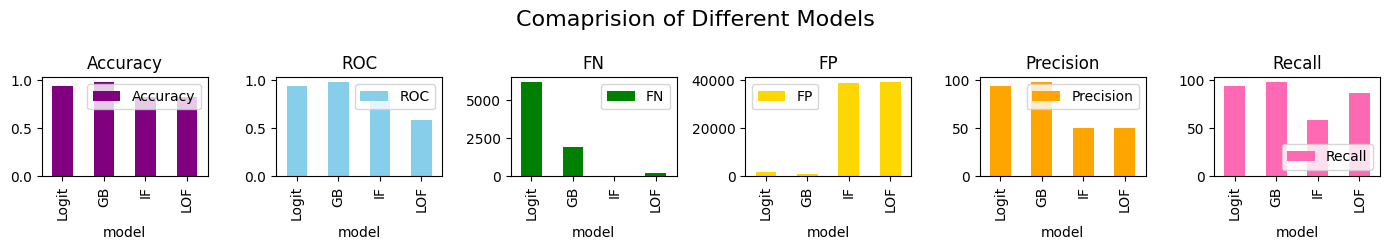

In [40]:
metric_df.plot(kind='bar', y=['Accuracy', 'ROC','FN','FP','Precision','Recall'],
               color=['purple','skyblue','green','gold','orange','hotpink'], figsize=(14, 2.5), subplots=True, layout=(1, 6))
plt.legend(loc ='lower right')

plt.suptitle('Comaprision of Different Models', fontsize=16)

plt.tight_layout()
plt.show()


- False Negative (FN): '**Less FN -> Less Fraud goes undetected**' – A lower count of False Negatives (FN) indicates that the anomaly detection model is effectively capturing actual fraudulent cases. This means it's performing well in identifying and flagging transactions that are genuinely fraudulent, reducing the risk of letting fraudulent activity go undetected. In contrast, higher FN counts in logistic regression and gradient boosting models imply a greater likelihood of genuine fraud cases being missed by these models.
- False Positives (FP): A Measure of Fraud Prevention – While all models exhibit good accuracy, the count of False Positives (FP) can serve as an indicator of the effectiveness of fraud prevention efforts. Fewer FPs mean that the model is better at minimizing the number of non-fraudulent transactions incorrectly classified as fraudulent. This is crucial for maintaining a positive user experience and avoiding unnecessary disruptions to genuine transactions.

In summary, the low FN count in the anomaly detection model indicates its proficiency in accurately identifying actual fraudulent transactions. Additionally, focusing on reducing FPs across all models helps ensure efficient fraud prevention without unnecessarily flagging legitimate transactions as fraudulent.


# **Conclusion**
The Isolation Forest, that results in a very low number of False Negatives (FN), in this case, only 38 (Out of 394 total fraud), it indicates that the model is particularly effective at identifying fraudulent transactions. Let's break down the implications of having such a low FN count in the context of fraud detection:

**Strong Sensitivity (True Positive Rate):**
 A low FN count means that the Isolation Forest is successfully capturing a significant portion of the actual fraudulent transactions. It has a high true positive rate (TPR), which is a desirable characteristic for a fraud detection model. The TPR tells us how many of the actual fraud cases are being correctly identified as fraud.

**Reduced Missed Fraudulent Transactions:** With only 38 FNs(out of 394), it implies that very few genuine fraud cases are slipping through undetected. This is especially important because missing fraudulent transactions can lead to financial losses and potential harm to customers.

Balancing Act: While having a low FN count is a positive sign, it's essential to consider the trade-off with the False Positive (FP) count. Lowering the FN count often comes at the cost of a higher FP count. In other words, the model may flag some non-fraudulent transactions as fraudulent (increasing the FP count) to minimize missed fraud cases (minimizing the FN count).

